
# pyencoded-tools 
# https://github.com/ENCODE-DCC/pyencoded-tools
# Skills Lab 2017



## Purpose

#### Tools for programmatically interacting with metadata on the portal

## Metadata includes
* #### Origin of raw data (donor, experimental conditions)
* #### Processing steps (align reads to assembly)
* #### Relation between files (this BAM derives from that FASTQ)

## *How is our metadata represented on the portal?*

## Objects!

In [4]:
!encode explore

Using server: https://www.encodeproject.org/
Found 1 /profiles/ 
IDRQualityMetric (dict)
CorrelationQualityMetric (dict)
FastqcQualityMetric (dict)
Page (dict)
BiosampleCharacterization (dict)
MouseDonor (dict)
UcscBrowserComposite (dict)
HumanDonor (dict)
BismarkQualityMetric (dict)
Source (dict)
TreatmentConcentrationSeries (dict)
Project (dict)
Annotation (dict)
Image (dict)
Lab (dict)
AnalysisStepVersion (dict)
HotspotQualityMetric (dict)
Biosample (dict)
Publication (dict)
PublicationData (dict)
Crispr (dict)
GeneticModificationCharacterization (dict)
User (dict)
GeneticModification (dict)
CpgCorrelationQualityMetric (dict)
Replicate (dict)
DonorCharacterization (dict)
FilteringQualityMetric (dict)
SamtoolsStatsQualityMetric (dict)
Experiment (dict)
Document (dict)
Software (dict)
TALEN (dict)
DuplicatesQualityMetric (dict)
ComplexityXcorrQualityMetric (dict)
AnalysisStepRun (dict)
MatchedSet (dict)
OrganismDevelopmentSeries (dict)
GenericQualityMetric (dict)
RNAi (dict)
SamtoolsF

##### *(All of our objects from https://www.encodeproject.org/profiles/)*

#### Includes not just a model of files but a model of everything associated with the generation and processing of genetic data (e.g. experiment, quality metric)

## Top objects by count

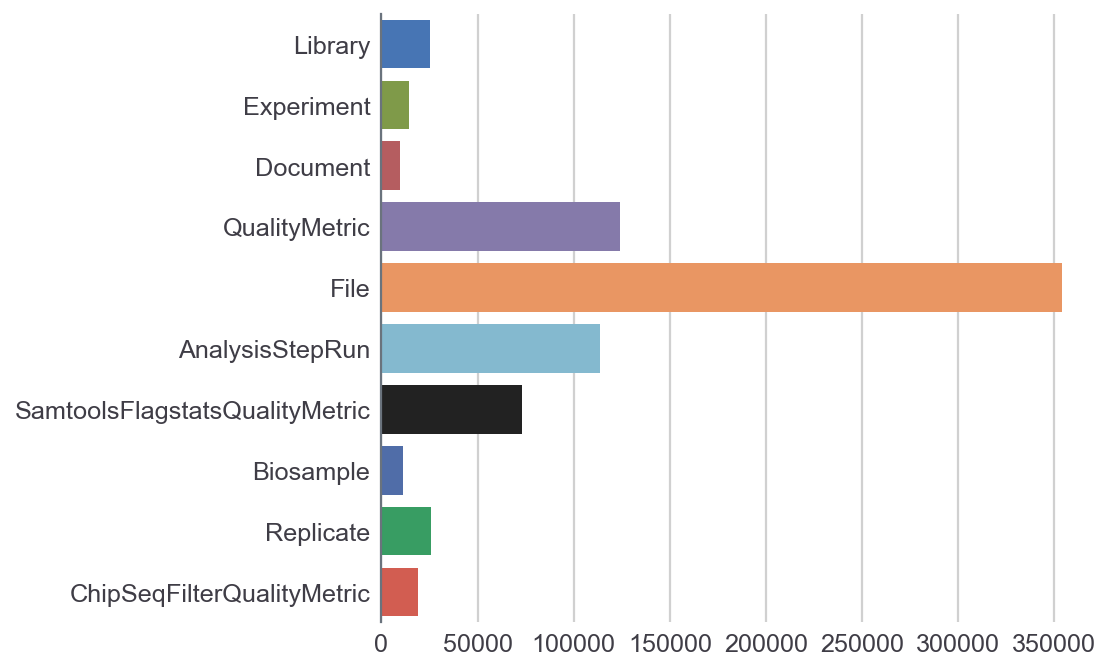

In [5]:
object_count()

## *What is an object?*

## Four fundamental building blocks

* #### Number

In [83]:
n = 4

* #### String (quotation marks)

In [7]:
s = 'string!'

* #### List (square brackets)

In [8]:
# This is a list of numbers.
x = [4, 6, 8]

# This is a list of strings.
x = ['string!', 'string!', 'string!']

* #### Dictionary (curly braces)

In [9]:
d = {'use me': 'to find me'}

# Use key to find value.
d['use me']

'to find me'

## JSON is a complex mixture of these four things

* #### Must have curly braces on the outside and double quotation marks on all strings

*Three Examples*

#### 1. Nested dictionaries

In [84]:
o = {'first_level': {'second_level': {'third_level': 'nested_value'}}}
print(json.dumps(o, indent=4))

{
    "first_level": {
        "second_level": {
            "third_level": "nested_value"
        }
    }
}


#### 2. Lists of dictionaries

In [11]:
o = {'list_of_objects': [{'thing': 'value_of_thing1'},
                         {'thing': 'value_of_thing2'},
                         {'thing': ['multiple', 'values', 'of', 'thing3',
                                   ['including', 'this', 'sublist']]}]}
print(json.dumps(o, indent=4))

{
    "list_of_objects": [
        {
            "thing": "value_of_thing1"
        },
        {
            "thing": "value_of_thing2"
        },
        {
            "thing": [
                "multiple",
                "values",
                "of",
                "thing3",
                [
                    "including",
                    "this",
                    "sublist"
                ]
            ]
        }
    ]
}


#### 3. Actual ENCODE object (genetic modification)

In [12]:
!encode get ENCGM330VHI

Using server: https://www.encodeproject.org/
{
    "@id": "/genetic-modifications/ENCGM330VHI/",
    "@type": [
        "GeneticModification",
        "Item"
    ],
    "accession": "ENCGM330VHI",
    "aliases": [
        "robert-waterston:OR3349-mod"
    ],
    "alternate_accessions": [],
    "award": "/awards/U41HG007355/",
    "biosamples_modified": [],
    "category": "insertion",
    "characterizations": [],
    "date_created": "2017-10-30T14:36:38.739604+00:00",
    "description": "odIs131[HIF-1::GFP]; hif-1(ia4) unc-119 (ed3)",
    "donors_modified": [
        "/worm-donors/ENCDO173ZSJ/"
    ],
    "introduced_tags": [
        {
            "location": "C-terminal",
            "name": "eGFP"
        }
    ],
    "lab": "/labs/robert-waterston/",
    "method": "bombardment",
    "modified_site_by_target_id": "/targets/eGFP-hif-1-celegans/",
    "modified_site_nonspecific": "random",
    "purpose": "tagging",
    "reagents": [
        {
            "identifier": "unknown",
      

## Scripts in pyencoded-tools *create*, *update*, and *read* these objects 

Three tools in particular for **_C.R.U.(D.)_**:
1.  #### **Create objects** - *ENCODE_import_data.py*
2. #### **Read objects** - *ENCODE_get_fields.py*
3. #### **Update objects** - *ENCODE_patch_set.py*
4. #### **(Delete objects)** - *Use patch_set to update status field to deleted*

## Setting up default keypairs

* #### Search for user on user page (https://www.encodeproject.org/users/)

![](prez/search.png)

* #### Click add acess key (returns *key* and *secret* associated with your account)

![user](prez/user.png)

* #### Save *keypairs.json* file in home directory (formatted as below) after filling in your server-specific keypairs

In [23]:
keypairs = !cat keypairs_template.json
print(json.dumps(json.loads(keypairs[0]), indent=4, sort_keys=True)) 

{
    "prod": {
        "key": "xxxxxxx",
        "secret": "xxxxxxx",
        "server": "https://www.encodeproject.org"
    },
    "test": {
        "key": "xxxxxxx",
        "secret": "xxxxxxx",
        "server": "https://test.encodedcc.org"
    }
}


## Creating an object

*Example for genetic modification*

* #### Look at all possible fields in *properties* field of schema

In [176]:
!encode explore --field GeneticModification.properties

Using server: https://www.encodeproject.org/
Found 1 /profiles/:GeneticModification.properties
treatments (dict)
alternate_accessions (dict)
biosamples_modified (dict)
RVD_sequence_pairs (dict)
status (dict)
aliases (dict)
guide_rna_sequences (dict)
rnai_sequences (dict)
introduced_tags (dict)
schema_version (dict)
submitted_by (dict)
reagents (dict)
zygosity (dict)
donors_modified (dict)
submitter_comment (dict)
purpose (dict)
award (dict)
category (dict)
@id (dict)
uuid (dict)
notes (dict)
modified_site_by_coordinates (dict)
modified_site_nonspecific (dict)
description (dict)
lab (dict)
characterizations (dict)
method (dict)
accession (dict)
@type (dict)
date_created (dict)
modified_site_by_target_id (dict)
modified_site_by_sequence (dict)
documents (dict)
introduced_sequence (dict)


* #### Look at minimum necessary fields in *required* field of schema

In [101]:
!encode explore --field GeneticModification.required

Using server: https://www.encodeproject.org/
Found 5 /profiles/:GeneticModification.required
lab
award
category
purpose
method


#### *Lab* and *award* point to objects while *category*, *purpose*, and *method* have enum fields that list allowed values

* #### Look at allowed values in *category* field

In [102]:
!encode explore --field GeneticModification.properties.category.enum

Using server: https://www.encodeproject.org/
Found 5 /profiles/:GeneticModification.properties.category.enum
deletion
interference
insertion
mutagenesis
replacement


* #### Look at allowed values in *purpose* field

In [35]:
!encode explore --field GeneticModification.properties.purpose.enum

Using server: https://www.encodeproject.org/
Found 6 /profiles/:GeneticModification.properties.purpose.enum
activation
analysis
overexpression
repression
tagging
validation


* #### Look at allowed values in *method* field

In [36]:
!encode explore --field GeneticModification.properties.method.enum

Using server: https://www.encodeproject.org/
Found 10 /profiles/:GeneticModification.properties.method.enum
bombardment
CRISPR
microinjection
mutagen treatment
RNAi
site-specific recombination
stable transfection
TALEN
transduction
transient transfection


* #### Build Excel file where sheet name is the name of the object and columns are field names

![create_object1](prez/create_object0.png)

* #### Specify
    * #### path to Excel file
    * #### *--key test*  (create object on test server)
    * #### *--update* (only pretends otherwise)

* #### Outputs
    * #### Name of server
    * #### JSON it will try to POST
    * #### Result of attempt (success/failure)

In [81]:
!python ENCODE_import_data.py prez/create_object.xlsx --key test --update

Running on https://test.encodedcc.org/
{'purpose': 'tagging', 'award': '/awards/U24HG009397/', 'aliases': ['j-michael-cherry:create_object'], 'lab': '/labs/j-michael-cherry/', 'method': 'bombardment', 'category': 'insertion'}
POSTing data!
GENETICMODIFICATION: 0 out of 1 posted, 1 errors, 0 patched
Posting failed for 1 object(s):
j-michael-cherry:create_object


#### Didn't work. *Why?*

#### Required fields have dependencies so object fails schema validation

In [73]:
!encode explore --field GeneticModification.dependencies

Using server: https://www.encodeproject.org/
Found 1 /profiles/:GeneticModification.dependencies
category (dict)
introduced_tags (dict)
guide_rna_sequences (dict)
rnai_sequences (dict)
method (dict)
treatments (dict)
purpose (dict)
introduced_sequence (dict)
RVD_sequence_pairs (dict)
reagents (dict)


#### Disentangling multiple dependencies can be complicated but comments in the schema usually help

<img src="prez/dependency1.png" alt="dependency" style="width: 700px;"/>

#### Means that when you specify *tagging* as the purpose and *insertion* as the category you must also specify **introduced_tags** and **modified_site_by_target_id** or **modified_site_nonspecific** fields

<img src="prez/dependency2.png" alt="dependency" style="width: 700px;"/>

#### Means that when you specify *bombardment* as the method you must also specify **reagents** field

#### Adding the new fields

![create_object1](prez/create_object_correct.png)

#### Running again

In [85]:
!python ENCODE_import_data.py prez/create_object1.xlsx --key test --update

Running on https://test.encodedcc.org/
{'award': '/awards/U24HG009397/', 'category': 'insertion', 'purpose': 'tagging', 'aliases': ['j-michael-cherry:create_object'], 'method': 'bombardment', 'introduced_tags': [{'location': 'unknown', 'name': 'mCherry'}], 'modified_site_by_target_id': '/targets/eGFP-hif-1-celegans/', 'reagents': [{'source': '/sources/source-bioscience/', 'identifier': 'unknown'}], 'lab': '/labs/j-michael-cherry/'}
POSTing data!
New accession/UUID: TSTGM949276
GENETICMODIFICATION: 1 out of 1 posted, 0 errors, 0 patched
New accession/UUID and alias:
TSTGM949276 j-michael-cherry:create_object


#### Works! Returns accession of newly created object: TSTGM949276

#### *What about the column names?*



* #### If it is type *string* don't add anything

In [90]:
!encode explore --field GeneticModification.properties.lab.type

Using server: https://www.encodeproject.org/
Found 1 /profiles/:GeneticModification.properties.lab.type
string


* #### If it is type *array* add *:list* or *:array* to end of field name (separate multiple items with comma)

In [88]:
!encode explore --field GeneticModification.properties.aliases.type

Using server: https://www.encodeproject.org/
Found 1 /profiles/:GeneticModification.properties.aliases.type
array


* #### If it is an *array* that takes multiple objects must number columns instead (use dash, start at one)

![create_object1](prez/reagent_excel.png)

#### *Builds up list of objects*

In [100]:
!python ENCODE_import_data.py prez/reagents_list.xlsx --key test

Running on https://test.encodedcc.org/
{'reagents': [{'source': 'https://www.encodeproject.org', 'identifier': 'unknown'}, {'source': '/sources/bacpac/', 'identifier': 'CH17-118C1'}, {'source': '/sources/addgene/', 'identifier': 'thing'}]}
GENETICMODIFICATION: 0 out of 1 posted, 0 errors, 0 patched


#### Use *--help* if you forget

In [104]:
!python ENCODE_import_data.py --help

usage: ENCODE_import_data.py [-h] [--type TYPE] [--key KEY]
                             [--keyfile KEYFILE] [--debug] [--update]
                             [--patchall]
                             infile

positional arguments:
  infile             the datafile containing object data to import

optional arguments:
  -h, --help         show this help message and exit
  --type TYPE        the type of the objects to import
  --key KEY          The keypair identifier from the keyfile. Default is
                     --key=default
  --keyfile KEYFILE  The keypair file. Default is
                     --keyfile=/Users/keenan/keypairs.json
  --debug            Print debug messages. Default is False.
  --update           Let the script PATCH the data. Default is False
  --patchall         PATCH existing objects. Default is False and will only
                     PATCH with user override

This script takes in an Excel file with the data
This is a dryrun-default script, run with --update or 

## Other common error output

* #### Using invalid keypairs

In [112]:
!python ENCODE_import_data.py prez/create_object1.xlsx --key bad_test --update

Running on https://test.encodedcc.org/
Sheet name 'GeneticModification' not part of supported object types!


*Response code = {"description": "This server could not verify that you are authorized to access the document you requested."}*

* #### Misspelling field name (*catgory* instead of *category*)

In [108]:
!python ENCODE_import_data.py prez/create_object_err_1.xlsx --key test --update

Running on https://test.encodedcc.org/
{'award': '/awards/U24HG009397/', 'purpose': 'tagging', 'method': 'bombardment', 'introduced_tags': [{'location': 'unknown', 'name': 'mCherry'}], 'aliases': ['j-michael-cherry:create_object_err_1'], 'lab': '/labs/j-michael-cherry/', 'catgory': 'insertion', 'modified_site_by_target_id': '/targets/eGFP-hif-1-celegans/', 'reagents': [{'source': '/sources/source-bioscience/', 'identifier': 'unknown'}]}
POSTing data!
GENETICMODIFICATION: 0 out of 1 posted, 1 errors, 0 patched
Posting failed for 1 object(s):
j-michael-cherry:create_object_err_1


*"errors": [{"description": "Additional properties are not allowed ('catgory' was unexpected)"}]*

* #### Using invalid value (*blending* instead of *bombardment*)

In [109]:
!python ENCODE_import_data.py prez/create_object_err_2.xlsx --key test --update

Running on https://test.encodedcc.org/
{'lab': '/labs/j-michael-cherry/', 'category': 'insertion', 'introduced_tags': [{'name': 'mCherry', 'location': 'unknown'}], 'aliases': ['j-michael-cherry:create_object_err_2'], 'award': '/awards/U24HG009397/', 'reagents': [{'identifier': 'unknown', 'source': '/sources/source-bioscience/'}], 'method': 'blending', 'modified_site_by_target_id': '/targets/eGFP-hif-1-celegans/', 'purpose': 'tagging'}
POSTing data!
GENETICMODIFICATION: 0 out of 1 posted, 1 errors, 0 patched
Posting failed for 1 object(s):
j-michael-cherry:create_object_err_2


*"errors": [{"description": "'blending' is not one of ['bombardment', 'CRISPR', 'microinjection', 'mutagen treatment', 'RNAi', 'site-specific recombination', 'stable transfection', 'TALEN', 'transduction', 'transient transfection']"}]*

## Editing the object we just created

#### Using ENCODE_patch_set.py
* #### Specify
    * #### *--key* (prod/test)
    * #### *--update* (really make the changes)
    * #### *--overwrite* (optional, overwrites lists instead of appending values)
    * #### *--remove* (optional, removes field instead of editing value)

#### Option 1: Editing one object
* #### Also specify
    * #### *--accession* (object to edit)
    * #### *--field* (field to update, not needed if you provide infile)
    * #### *--data* (updated value, not needed if you provide infile)

#### Change award value

In [123]:
!python ENCODE_patch_set.py --key test --accession TSTGM949276 --field award --data /awards/UM1HG009411/ --update

Running on https://test.encodedcc.org/
This is an UPDATE run, data will be patched
OBJECT: TSTGM949276
OLD DATA: award /awards/U24HG009397/
NEW DATA: award /awards/UM1HG009411/


#### Option 2: Editing multiple objects
* #### Also specify
    * #### *--infile* (path to file)

#### *Infile is a TSV where column names are fields to edit (must always have accession/@id/uuid column to identify objects) and rows are new values*

![derived_from_patch](prez/df_patch.png)

#### Using UUID
![stat_patch](prez/stat_patch.png)

#### List of objects
![list_of_objects](prez/patch_list_objects.png)

## Getting values from our object

#### Using ENCODE_get_fields.py
* #### Specify
    * #### *--key* (prod/test)
    * #### *--infile* (path to file containing list of accessions or single accession)
    * #### *--field* (field of interest or multiple fields separated by commas, no spaces)
    * #### *--allfields* (optional flag, returns values of all fields in object)

#### Get award and status

In [129]:
!python ENCODE_get_fields.py --key test --infile TSTGM949276 --field award,status

#### Get all fields

In [165]:
data = !python ENCODE_get_fields.py --key test --infile TSTGM949276 --allfields
pd.read_table(StringIO('\n'.join(data))).dropna(axis=1) 

,@id,@type:array,accession,aliases:array,award,category,date_created,introduced_tags:array,lab,method,modified_site_by_target_id,purpose,reagents:array,schema_version,status,submitted_by,uuid
0,/genetic-modifications/TSTGM949276/,"['GeneticModification', 'Item']",TSTGM949276,['j-michael-cherry:create_object'],/awards/UM1HG009411/,insertion,2017-11-16T02:18:34.221369+00:00,"[{'name': 'mCherry', 'location': 'unknown'}]",/labs/j-michael-cherry/,bombardment,/targets/eGFP-hif-1-celegans/,tagging,"[{'source': '/sources/source-bioscience/', 'id...",6,in progress,/users/7e95dcd6-9c35-4082-9c53-09d14c5752be/,6caf68ad-2eae-4125-8eae-1383d49ac8b7


## Review

#### *pyencoded-tools* make interacting with metadata much faster and less error-prone
![patching_gif](prez/patchinggif2.gif)

## Use
* #### *ENCODE_import_data.py* to **create** objects
* #### *ENCODE_patch_set.py* to **edit** objects
* #### *ENCODE_get_fields.py* to **read** objects

## Other scripts in *pyencoded-tools* variation of the above
* #### *Releasinator* specialized *ENCODE_patch_set.py* that changes statuses of hierarchy of objects
* #### *Reporter* specialized *ENCODE_get_fields.py* that traverses associated objects (e.g. experiments to files)
* #### Other scripts specialized external audits (get data, compare data)
* #### [Aditi's *pyencoded-tools* cheat sheet](https://docs.google.com/document/d/1QdvOgnMXc8L7wqw6-_C4KUqnbVKxu1hs33KGfiCo3UE)

## Future
* #### *Ideas for better tools?*
    * #### Currently no consistency between tools
    * #### Impossible to do certain things (e.g. patching nested fields)
* #### Integration of separate scripts into one command-line interface
    * #### *Worth the time?*
    * #### *Who would primarily use it?*
    * #### *What is the most complicated use case?*

In [162]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import pandas as pd
import requests
import seaborn as sns
from io import StringIO
from jupyterthemes import jtplot
jtplot.style()

In [172]:
count_by_object = [
    ('Library', 25297),
    ('Experiment', 14348),
    ('Document', 9894),
    ('QualityMetric', 124128),
    ('File', 353847),
    ('AnalysisStepRun', 113789),
    ('SamtoolsFlagstatsQualityMetric', 72999),
    ('Biosample', 11453),
    ('Replicate', 25936),
    ('ChipSeqFilterQualityMetric', 19074)
]

def object_count():
    df = pd.DataFrame(count_by_object)
    df = df.rename(columns={0: 'name', 1: 'value'})
    sns.barplot(y='name', x='value', data=df)
    ax = sns.plt.gca()
    ax.set(ylabel='', xlabel='')
    sns.despine(bottom=True)